<a href="https://colab.research.google.com/github/raziuddin995/NLP_Project/blob/main/Face_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
label_file_path = r"/content/drive/MyDrive/data/label/label.lst"
Images_folder_path = r"/content/drive/MyDrive/new_data"

In [ ]:
import pandas as pd
df = pd.read_csv(label_file_path, sep=" ", header=None)
col_names = "image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_cofidence expression_label".split()
df.columns = col_names
df

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_cofidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [ ]:
import os
import cv2
from tqdm import tqdm_gui

all_images = []
all_labels = []
all_confidences = []

for i, row in df.iterrows():
    image_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    confidence = row["face_box_cofidence"]

    if confidence < 60:
        continue  # Skip images with confidence less than 60

    combined_filename = os.path.join(Images_folder_path, image_name)
    img = cv2.imread(combined_filename)

    if img is not None:
        cropped_img = img[y1:y2, x1:x2]
        print(f"Face shape: {cropped_img.shape}, x1={x1}, x2={x2}, y1={y1}, y2={y2}")
    else:
        continue

    if cropped_img is not None:
        face_resized = cv2.resize(cropped_img, (64, 64))
    else:
        continue

    all_images.append(face_resized)
    all_labels.append(label)
    all_confidences.append(confidence)





Face shape: (135, 135, 3), x1=450, x2=585, y1=180, y2=315
Face shape: (274, 274, 3), x1=365, x2=639, y1=228, y2=502
Face shape: (96, 96, 3), x1=240, x2=336, y1=128, y2=224
Face shape: (56, 56, 3), x1=71, x2=127, y1=37, y2=93
Face shape: (80, 80, 3), x1=202, x2=282, y1=289, y2=369
Face shape: (80, 80, 3), x1=647, x2=727, y1=182, y2=262
Face shape: (132, 132, 3), x1=431, x2=563, y1=22, y2=154
Face shape: (80, 80, 3), x1=168, x2=248, y1=962, y2=1042
Face shape: (68, 68, 3), x1=340, x2=408, y1=102, y2=170
Face shape: (191, 191, 3), x1=239, x2=430, y1=47, y2=238
Face shape: (377, 377, 3), x1=94, x2=471, y1=94, y2=471
Face shape: (57, 57, 3), x1=76, x2=133, y1=52, y2=109
Face shape: (81, 81, 3), x1=344, x2=425, y1=74, y2=155
Face shape: (135, 135, 3), x1=237, x2=372, y1=90, y2=225
Face shape: (47, 47, 3), x1=91, x2=138, y1=167, y2=214
Face shape: (325, 325, 3), x1=758, x2=1083, y1=108, y2=433
Face shape: (57, 57, 3), x1=591, x2=648, y1=681, y2=738
Face shape: (96, 96, 3), x1=32, x2=128, y1=2

In [ ]:
print(len(all_images))
print(len(all_labels))

4235
4235


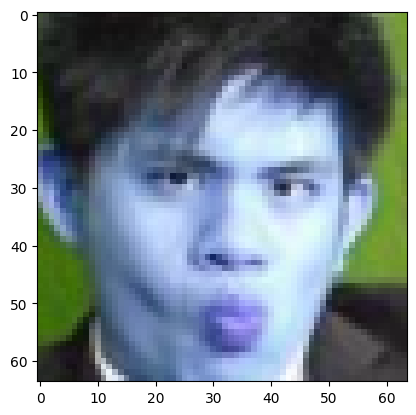

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(all_images[2])

In [ ]:
import numpy as np
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [ ]:
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import os
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

In [ ]:
# Convert lists to NumPy arrays
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Normalize pixel values to the range [0, 1]
all_faces = all_images.astype('float32') / 255.0



# Split the dataset into training, validation, and test sets (70%, 15%, 15%)
X_train, X_temp, y_train, y_temp = train_test_split(all_faces, all_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Define image properties
image_height, image_width, num_channels = all_faces[0].shape  # Assuming all_faces contains at least one image
num_classes = len(np.unique(all_labels))

# Convert the labels to one-hot encoded format with 7 classes
num_classes = 7
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

# Verify the shapes after one-hot encoding
print("After one-hot encoding:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


After one-hot encoding:
X_train shape: (2964, 64, 64, 3)
y_train shape: (2964, 7)
X_val shape: (635, 64, 64, 3)
y_val shape: (635, 7)
X_test shape: (636, 64, 64, 3)
y_test shape: (636, 7)


In [ ]:

# Create a simple CNN model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a data generator with augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Fit the generator on your training data
datagen.fit(X_train)


model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(image_height, image_width, num_channels)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


from tensorflow.keras.optimizers import Adam

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Schedule and Early Stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)





Epoch 1/50
93/93 [==============================] - 8s 55ms/step - loss: 1.2661 - accuracy: 0.5553 - val_loss: 1.2769 - val_accuracy: 0.5559
Epoch 2/50
93/93 [==============================] - 5s 51ms/step - loss: 1.2091 - accuracy: 0.5692 - val_loss: 1.2550 - val_accuracy: 0.5291
Epoch 3/50
93/93 [==============================] - 5s 50ms/step - loss: 1.1729 - accuracy: 0.5739 - val_loss: 1.1316 - val_accuracy: 0.5858
Epoch 4/50
93/93 [==============================] - 4s 42ms/step - loss: 1.1434 - accuracy: 0.5850 - val_loss: 1.1082 - val_accuracy: 0.6031
Epoch 5/50
93/93 [==============================] - 6s 61ms/step - loss: 1.1105 - accuracy: 0.5924 - val_loss: 1.0401 - val_accuracy: 0.6126
Epoch 6/50
93/93 [==============================] - 4s 43ms/step - loss: 1.1014 - accuracy: 0.5995 - val_loss: 1.0817 - val_accuracy: 0.6252
Epoch 7/50
93/93 [==============================] - 4s 43ms/step - loss: 1.0808 - accuracy: 0.6043 - val_loss: 1.0182 - val_accuracy: 0.6236
Epoch 8/50
93

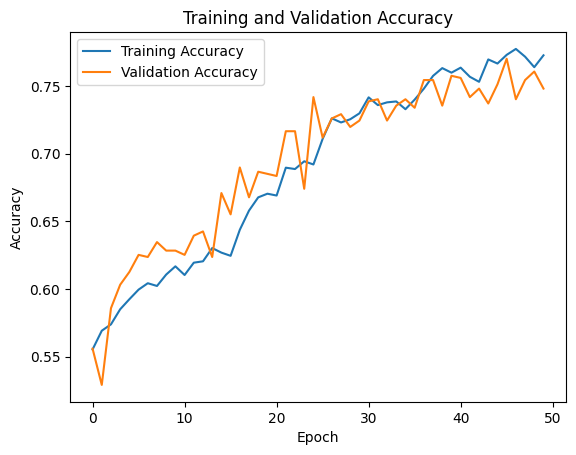

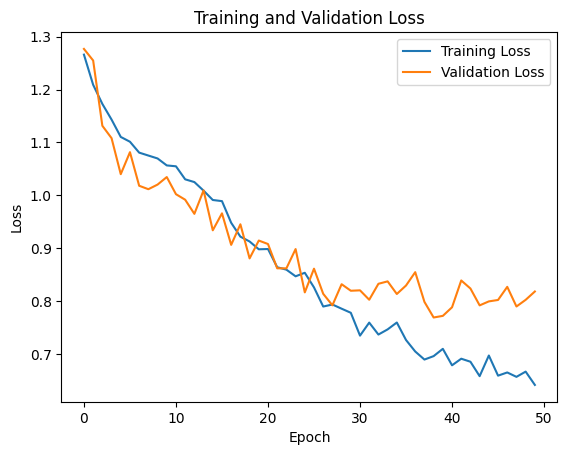

20/20 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        23
           2       0.00      0.00      0.00         2
           3       0.87      0.84      0.86       364
           4       0.00      0.00      0.00        12
           5       0.67      0.80      0.73        82
           6       0.61      0.74      0.67       151

    accuracy                           0.76       636
   macro avg       0.31      0.34      0.32       636
weighted avg       0.73      0.76      0.74       636



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
batch_size = 32
# Train the model

# Use the generator to augment data during training
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=50, validation_data=(X_val, y_val))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

# Plot training and validation accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

from sklearn.metrics import classification_report


# Evaluate on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(classification_report(y_true_classes, y_pred_classes))

20/20 [==============================] - 0s 9ms/step


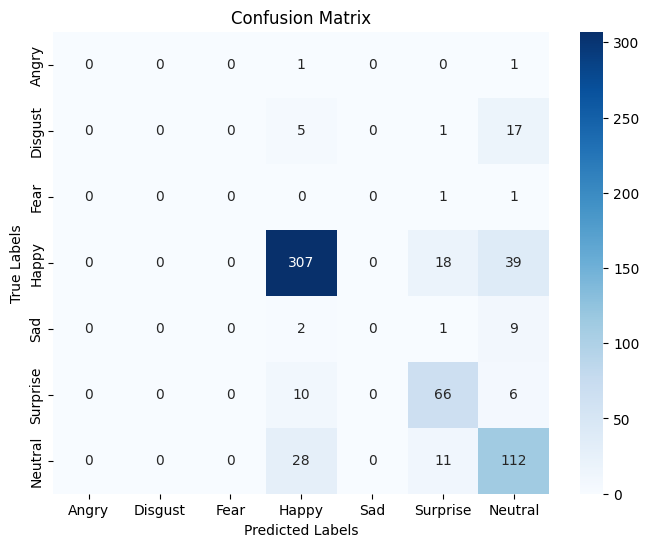

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Get the model predictions on the test set
y_pred = model.predict(X_test)

# Convert the one-hot encoded predictions to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Convert one-hot encoded true labels to class labels
y_true_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Define emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=emotion_labels, yticklabels=emotion_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
